<a href="https://colab.research.google.com/github/hdrcruz/machine-learning/blob/main/harmoy-search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas



In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
import random

# Gerando Grafo


In [ ]:
nodes = 20
colors = ['r','b','g', 'y', 'c']
colors_prob = [0.2, 0.2, 0.2, 0.2, 0.2, ]

G = nx.complete_graph(nodes)
for edge in G.edges():
    G.edges[edge]['color'] = np.random.choice(colors, p = colors_prob)
df = nx.to_pandas_edgelist(G)

# Definindo parâmetros do algoritmo

In [ ]:
harmony_memory_size = 200 #quantidade de soluções na memória
harmony_consideration_rate = 0.7 #probabilidade de usar uma solução já existente

pitch_adjustment_rate = 0.5
bandwitch_adjustment = 2

max_imp = 10000
n_variables = nx.number_of_nodes(G) - 1 #Tamanho dos atributos de uma solução

# Implementando Algoritmo

In [ ]:
def objective_function(harmony): #retorna quantidade de rótulos unicos na harmonia
  labels = df.loc[harmony]['color'].unique()
  G = nx.from_pandas_edgelist(df.loc[harmony])
  is_tree = nx.is_tree(G)
  penalty = 0 if is_tree else 10
  return (len(labels) + penalty)
    
def get_note(harmony): #seleciona aleatoriamente uma aresta
    #restrição 1: Não pode selecionar uma aresta já existente
    available_edges = list(i for i in range(0,len(df.index)) if i not in [harmony])
    return random.choice(available_edges)
    
def adjust_note(note:int, bandwitch_adjustment: int):
    return note
    

def new_harmony(harmony_memory, harmony_consideration_rate:float, n_variables:int, pitch_adjustment_rate: float, bandwitch_adjustment: int):
    new_harmony = list()
    for i in range(n_variables):
        r = random.random()
        if (r <= harmony_consideration_rate):
            new_harmony.append(random.choice(list(harmony_memory['edge ' + str(i)])))
            k = random.random()
            if (k <= pitch_adjustment_rate):
                new_harmony[i] = get_note(new_harmony)
        else:
           new_harmony.append(get_note(new_harmony)) #seleciona aleatoriamente uma aresta
    return new_harmony

def harmony_search():
    columns=['edge ' + str(x) for x in range(n_variables)] + ['value']
    hm = []
    for _ in range(harmony_memory_size):
        ih = random.choices(range(0,len(df.index)),k=n_variables)
        ih.append(objective_function(ih))
        hm.append(ih)      
    harmony_memory = pd.DataFrame(data=hm, columns=columns)
    for _ in range(max_imp):
      nh = new_harmony(harmony_memory, harmony_consideration_rate, n_variables, pitch_adjustment_rate, bandwitch_adjustment)
      nh.append(objective_function(nh))
      nh_pandas = pd.Series(data=nh, index=harmony_memory.columns)
      harmony_memory = harmony_memory.append(nh_pandas, ignore_index=True)
      harmony_memory.sort_values('value', inplace=True)
      harmony_memory.reset_index(drop=True, inplace=True)
      harmony_memory.drop(harmony_memory.index[-1], inplace=True)
    return list(harmony_memory.iloc[0,0:n_variables])

# Execução

Melhor solução encontrada: 
     source  target color
47        2      13     g
80        4      15     r
102       6      10     c
101       6       9     c
74        4       9     r
132       8      17     r
161      11      19     g
48        2      14     r
58        3       8     r
10        0      11     c
70        4       5     c
15        0      16     g
143       9      18     c
77        4      12     c
141       9      16     g
62        3      12     g
92        5      13     g
92        5      13     g
92        5      13     g
Labels: 
['g' 'r' 'c']


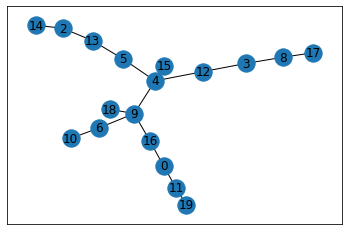

In [ ]:
res_df = df.loc[harmony_search()]
print('Melhor solução encontrada: ')
print(res_df)
print('Labels: ')
print(res_df.color.unique())
lolG = nx.from_pandas_edgelist(res_df, edge_attr=True)
nx.draw_networkx(lolG)